## Week 12 Assignment - W200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. This assignment addresses material covered in Unit 11. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. 

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

** DO NOT PUSH THIS FILE TO YOUR GITHUB REPO ! **

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say YOUR ANSWER HERE to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)

## Setup

Run the two cells below. 

The first cell will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.  

The second cell subsets the dataframe to focus on just the primary period through May 2016. Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
print(contrib.shape)

# Note - for now, it is okay to ignore the warning about mixed types. 

/Users/swllms/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1125659, 18)


In [3]:
# Subset data to primary period 
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(654502, 18)


## 1. Data  Exploration (20 points)

**1a. First, take a preliminary look at the data.**
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this data (link above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the `election_tp` variable contain?

In [4]:
# 1a YOUR CODE HERE
print('Data Shape:', contrib.shape)
print('Column Names:', list(contrib.columns))

Data Shape: (654502, 18)
Column Names: ['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp']


`1a RESPONSE:`There are 18 variables in this data set with 654,502 rows. All the columns are present in the loaded dataset based on the documentation. I believe that that the data in the CSV file is indexed based on the cmte_id (Commitee ID : A 9-character alpha-numeric code assigned to a committee by the Federal Election Commission) but the dataset was loaded in with a numerical index as you can see when look at contrib.head(). The election_tp variable contains information on the year the election and election type, such as a primary election or general election. 

**1b. Print the first 5 rows from the dataset to manually check some of the data.** 

This is a good idea to ensure the data loaded and the columns parsed correctly!

In [5]:
# 1b YOUR CODE HERE
contrib.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c. Pick three variables from the dataset above and run some quick sanity checks.**

When working with a new dataset, it is important to explore and sanity check your variables. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use the three markdown cells below to explain if your **three** chosen variables "pass" your sanity checks or if you have concerns about the integrity of your data and why. 

In [6]:
# 1c YOUR CODE HERE for variable #1
contrib['cand_nm'].value_counts()

Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: cand_nm, dtype: int64

In [7]:
# 1c YOUR CODE HERE for variable #2
contrib['election_tp'].value_counts()

P2016    649293
G2016      5064
P2020         7
Name: election_tp, dtype: int64

In [8]:
# 1c YOUR CODE HERE for variable #3
print('Max Value Contributed:', contrib['contb_receipt_amt'].max())
print('Min Value Contributed:', contrib['contb_receipt_amt'].min())
print('Average Value Contributed:', contrib['contb_receipt_amt'].mean())

Max Value Contributed: 10800.0
Min Value Contributed: -10000.0
Average Value Contributed: 126.4980542611056


`1c RESPONSE:` Variable 1: Candidate Name value counts is in line with what I was expected. Each name identifies the unique candidate. Variable 2: Election Type by year is not entirely what I expected as it includes primary election data for 2020. Seeing as we are only into the 4 month of the year and many primaries have been turned on their heads due to COVID-19, I would likely not include this information, depending on what kind of analysis I was conducting. Variable 3: Contributed Reciept Amount includes refunds and transfers in addition to the contriubtion details. Depending on the analysis, I may exclude refunds as part of my exploration. 

**1d. Plotting a histogram** 

Make a histogram of **one** of the variables you picked above. What are some insights that you can see from this histogram? 
Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values
- Hint: For some variables the range of values is very large. To do a better exploration, make the initial histogram the full range and then you can make a smaller histogram 'zoomed' in on a discreet range.

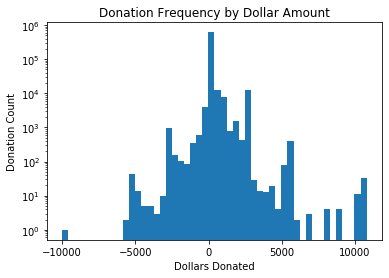

In [25]:
# 1d YOUR CODE HERE
plt.hist(contrib['contb_receipt_amt'], bins = 50, log=True);
plt.title('Donation Frequency by Dollar Amount')
plt.xlabel('Dollars Donated')
plt.ylabel('Donation Count')
plt.show()

`1d RESPONSE:` There are quite a number of individuals who have been refunded their donations. However but the bulk of the donations are under the $5000 mark with the majority comprising of small 2-3 figure dollar amounts. 

## 2. Exploring Campaign Contributions (30 points)

Let's investigate the donations to the candidates.

**2a. Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top. 
- 

Which candidate received the largest number of contributions (variable 'contb_receipt_amt')?

In [11]:
# 2a YOUR CODE HERE
cxd = contrib.groupby('cand_nm')['contb_receipt_amt'].count().sort_values(ascending = False)
cxd

cand_nm
Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: contb_receipt_amt, dtype: int64

`2a RESPONSE:` The candidate that received the largest number of contributions was Bernard Sanders.

**2b. Now, present a table that shows the total value of donations to each candidate. sorted by total value of the donations**

Which candidate raised the most money in California?

In [12]:
# 2b YOUR CODE HERE
cxdd = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending = False)
cxdd

cand_nm
Clinton, Hillary Rodham     39,368,777.01
Sanders, Bernard            18,773,871.31
Cruz, Rafael Edward 'Ted'    6,286,460.34
Rubio, Marco                 4,846,483.72
Bush, Jeb                    3,325,536.83
Carson, Benjamin S.          2,952,109.00
Kasich, John R.              1,553,823.54
Fiorina, Carly               1,468,489.42
Trump, Donald J.               893,356.89
Paul, Rand                     797,624.29
Walker, Scott                  495,006.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             408,595.00
O'Malley, Martin Joseph        297,834.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               186,144.50
Webb, James Henry Jr.           76,568.16
Johnson, Gary                   41,187.60
Santorum, Richard J.            36,304.88
Pataki, George E.               30,450.00
Stein, Jill                     27,918.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

`2b RESPONSE:` Hillary Rodham Clinton raised the most money in California. 

**2c. Combine the tables (sorted by either a or b above).**

- What is the "type" of the two tables you presented above - Series or DataFrames?
- Convert any Series to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [13]:
# 2c YOUR CODE HERE
print('Table 1 Data type:', type(cxd))
print('Table 2 Data type:', type(cxdd))

df = pd.concat([cxd, cxdd], axis=1, sort=False)
df.index.names = ['candidate']
df.columns = ['all_don_count', 'total_dollars_donated']
df

Table 1 Data type: <class 'pandas.core.series.Series'>
Table 2 Data type: <class 'pandas.core.series.Series'>


,all_don_count,total_dollars_donated
candidate,,
"Sanders, Bernard",371795,"18,773,871.31"
"Clinton, Hillary Rodham",163509,"39,368,777.01"
"Cruz, Rafael Edward 'Ted'",57136,"6,286,460.34"
"Carson, Benjamin S.",27342,"2,952,109.00"
"Rubio, Marco",14089,"4,846,483.72"
"Fiorina, Carly",4696,"1,468,489.42"
"Paul, Rand",4256,"797,624.29"
"Bush, Jeb",3114,"3,325,536.83"
"Kasich, John R.",2988,"1,553,823.54"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation**

In [14]:
# 2d YOUR CODE HERE
df['avg_doll_donation'] = df['total_dollars_donated']/df['all_don_count']
df.sort_values('avg_doll_donation', ascending = False)

,all_don_count,total_dollars_donated,avg_doll_donation
candidate,,,
"Gilmore, James S III",3,"8,100.00","2,700.00"
"Perry, James R. (Rick)",116,"208,400.00","1,796.55"
"Pataki, George E.",20,"30,450.00","1,522.50"
"Christie, Christopher J.",333,"456,066.00","1,369.57"
"Graham, Lindsey O.",342,"408,595.00","1,194.72"
"Bush, Jeb",3114,"3,325,536.83","1,067.93"
"O'Malley, Martin Joseph",397,"297,834.26",750.21
"Jindal, Bobby",31,"23,231.26",749.40
"Webb, James Henry Jr.",106,"76,568.16",722.34


**2e. Plotting a Bar Chart**

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Hint: Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

In [15]:
#Remove the colmn no longer needed 
df = df.drop('all_don_count', 1)

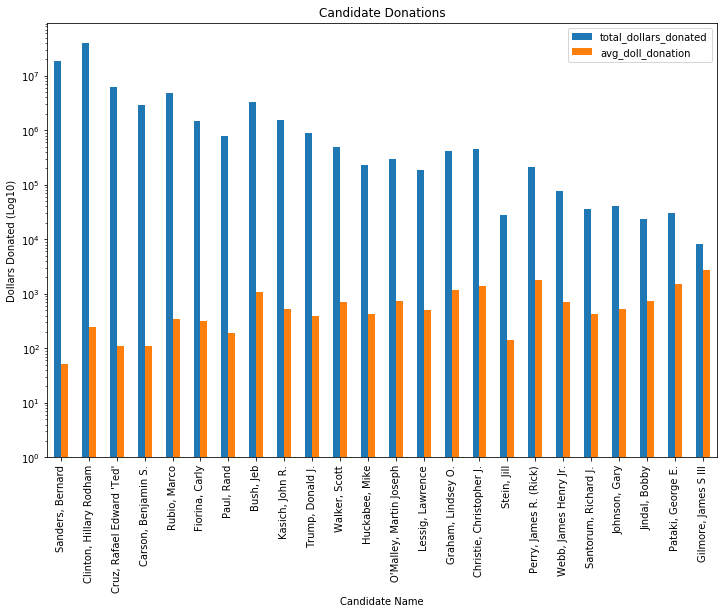

In [16]:
# 2e YOUR CODE HERE
ax = df.plot(kind='bar', log=True, title='Candidate Donations', figsize=(12,8))
ax.set_xlabel("Candidate Name")
ax.set_ylabel("Dollars Donated (Log10)")
plt.show()

**2f. Comment on the results of your data analysis in a short paragraph.**

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

`2f RESPONSE:` Candidates with a smaller average donation, have a greater total dollar donated to that candidate. The majority of California campaign contributions went to two candidates, Bernie Sanders and Hillary Clinton. 

## 3. Exploring Donor Occupations (30 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a. Show the top 5 occupations of individuals that contributed to Hillary Clinton.** 

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [32]:
# 3a YOUR CODE HERE
cand = contrib.groupby('cand_nm')
hc = cand.get_group('Clinton, Hillary Rodham')
don_oc = hc.groupby('contbr_occupation')['contb_receipt_amt'].count().sort_values(ascending = False)
don_oc.head(5)

contbr_occupation
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contb_receipt_amt, dtype: int64

**3b. Write a function called `get_donors`.**

Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [29]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    don_oc = df.groupby('contbr_occupation')['contb_receipt_amt'].count().sort_values(ascending = False)
    return don_oc.head(5)

**3c. Now run the `get_donors` function on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below.**

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [33]:
# 3c YOUR CODE HERE
#Hillary Clinton
get_donors(hc)

contbr_occupation
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contb_receipt_amt, dtype: int64

In [34]:
#Bernie Sanders
bs = cand.get_group('Sanders, Bernard')
get_donors(bs)

contbr_occupation
NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contb_receipt_amt, dtype: int64

In [35]:
#Donald Trump
dt = cand.get_group('Trump, Donald J.')
get_donors(dt)

contbr_occupation
RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
Name: contb_receipt_amt, dtype: int64

**3d. Finally, use `groupby` to separate the entire dataset by candidate.**

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [36]:
# 3d YOUR CODE HERE
contrib.groupby('cand_nm').apply(get_donors)

cand_nm                    contbr_occupation                     
Bush, Jeb                  RETIRED                                     996
                           HOMEMAKER                                   180
                           ATTORNEY                                     92
                           Q.A.                                         89
                           PRESIDENT                                    84
Carson, Benjamin S.        RETIRED                                   13692
                           INFORMATION REQUESTED PER BEST EFFORTS     1614
                           HOMEMAKER                                  1049
                           PHYSICIAN                                   329
                           R.N.                                        234
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e. Comment on your data insights & findings in a short paragraph.**

`3e RESPONSE:` Where are all these retired and unemployed people getting thefunds to make all these donations? I also find it surprising that there is such a large amount of "Information Requested" along with variations of the phrase, listed as the occupation. It is a clean way of dealing with missing values but could be consolidated. Additionally, some of the occupations could be cleaned up, for example math teacher, teacher and professor are all in education.

**3f. Think about your findings in section 3 vs. your findings in section 2 of this assignment.**

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

`3f RESPONSE:` Candidates with more dollars donated may have targeted particular groups more thoroughly the top 5 donations by occupation number in the thousands. These candidate's had a stronger understanding of their base. Side note: I find it really interesting that Carly Fiorina did not have any occupations in technology even though she came from that industry. She couldn't win over Silicon Valley. 


## 4. Plotting Data (20 points)

There is an important element that we have not yet explored in this dataset - time.

**4a. Present a single line chart with the following elements.**

- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

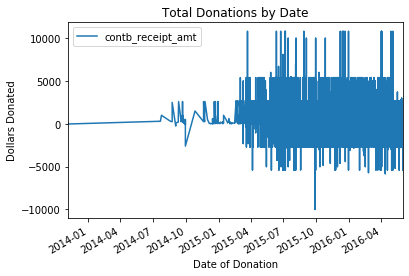

In [39]:
# 4a YOUR CODE HERE
lp = contrib.plot.line(x='contb_receipt_dt', y='contb_receipt_amt', title ='Total Donations by Date')
lp.set_xlabel("Date of Donation")
lp.set_ylabel("Dollars Donated")
plt.show()

**4b. Make a better time-series line chart**

This chart is messy and it is hard to gain insights from it.  Improve the chart from 4a so that your new chart shows a specific insight. In the spot provided, write the insight(s) that can be gained from this new time-series line chart.

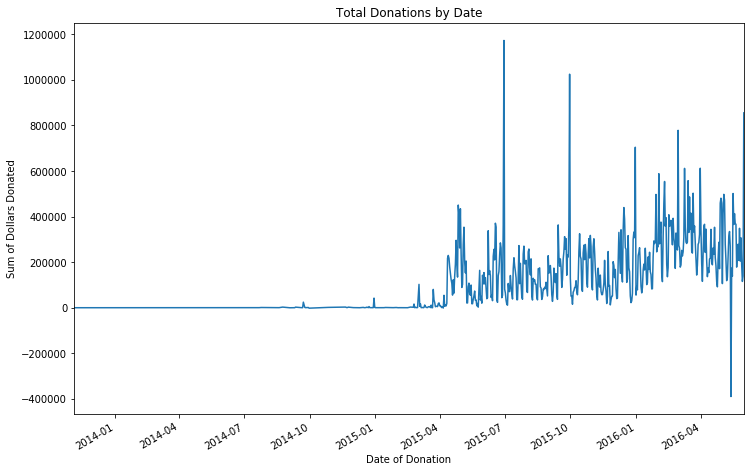

In [45]:
# 4b YOUR CODE HERE
adt = contrib.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()

ap = adt.plot.line(x='contb_receipt_dt', y='contb_receipt_amt', title ='Total Donations by Date', figsize=(12,8))
ap.set_xlabel("Date of Donation")
ap.set_ylabel("Sum of Dollars Donated")
plt.show()

`4b RESPONSE:` The chart above looks at the sum of the donations on any given date. We can clearly see spikes in donations as we get closer to the primary election nominations. We can also see a spike in refunds near the time of party nominations.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k